# Einführung in Digitale Bildverarbeitung mit Python

Modul 2040.2 Bildsensorik & Bildverarbeitung

Stephan Nebiker, 14.05.2019

# Teil 4: Histogramme

In [1]:
# Laden der erforderlichen Pakete
from skimage import data, io, color, filters, exposure
import numpy as np
import matplotlib.pyplot as plt


## Histogramme erzeugen, verändern und darstellen

Analysieren und dokumentieren / kommentieren Sie den Code in den folgenden Abschnitten 1) bis 4), welche die Erzeugung eines Histogramms, eine Histogrammstreckung und schliesslich eine Binarisierung eines Graustufenbilds zum Ziel haben.

Hinweis: Konsultieren Sie dazu die passende scikit-image Dokumentation.

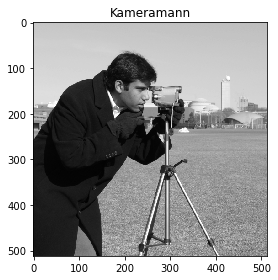

In [2]:
# 1) Bilddatei öffnen und Bild laden
camera_bild = data.camera()

plt.figure()
plt.title('Kameramann')

io.imshow(camera_bild)
io.show()

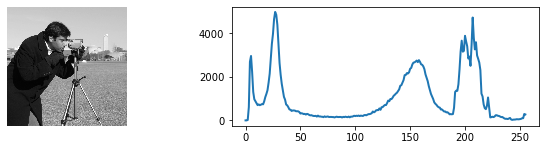

In [3]:
# 2) Histogramm erzeugen
# vgl. auch Bsp. in: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

hist, bins_center = exposure.histogram(camera_bild)

plt.figure(figsize=(9, 4))
plt.subplot(221)
plt.imshow(camera_bild, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(222)
plt.plot(bins_center, hist, lw=2)

plt.tight_layout()
plt.show()

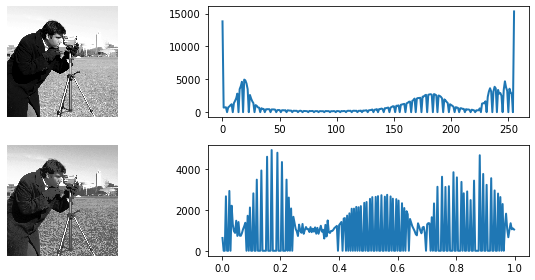

In [4]:
# 3) Kontrast-Streckung / Histogramm-Streckung mittels Percentilen

p2, p98 = np.percentile(camera_bild, (5, 95))
img_rescale = exposure.rescale_intensity(camera_bild, in_range=(p2, p98))
hist2, bins_center2 = exposure.histogram(img_rescale)

#Histogramm-Verebnung
img_eq = exposure.equalize_hist(camera_bild)
hist3, bins_center3 = exposure.histogram(img_eq)

plt.figure(figsize=(9, 4))
plt.subplot(221)
plt.imshow(img_rescale, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(222)
plt.plot(bins_center2, hist2, lw=2)
plt.subplot(223)
plt.imshow(img_eq, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(224)
plt.plot(bins_center3, hist3, lw=2)

plt.tight_layout()
plt.show()

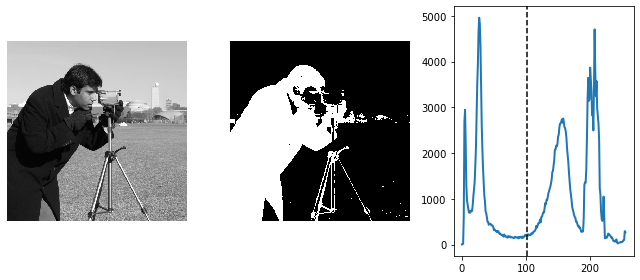

In [5]:
# 4) Histogramm-basierte Schwellwertoperationen

# Binarisierung des Grauwertbilds mit Hilfe des OTSU-Filters
# Bestimmung eines Threshold-Werts (val) für die 
val = filters.threshold_otsu(camera_bild)

hist, bins_center = exposure.histogram(camera_bild)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera_bild, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(camera_bild < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--') # zeichnet senkrechte Linie mit Abszisse val

plt.tight_layout()
plt.show()